In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
# creating Database connections
conn=sqlite3.connect('inventory_db.sqlite3')


In [3]:
tables = pd.read_sql_query("select name from sqlite_master where type='table'",conn)

In [ ]:
#Fetching Vendor summary data
df= pd.read_sql_query("select * from Vendor_Sales_Summary",conn)
df.head()

In [9]:
# summary statistics
df.describe().T # transpose

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


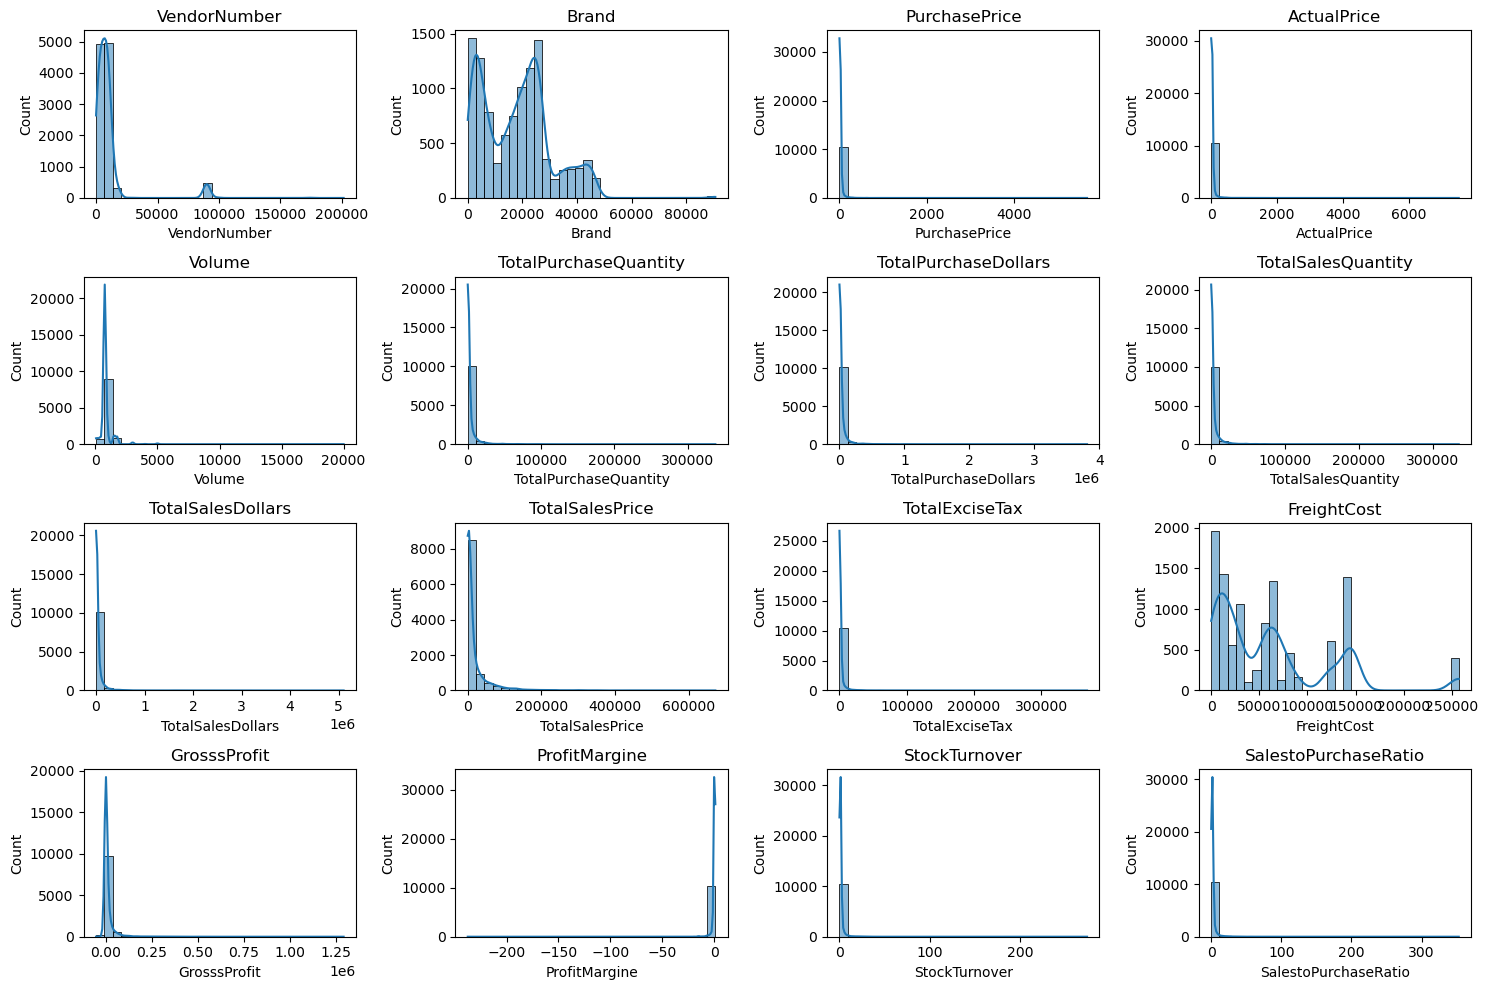

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 4, i + 1)  # Adjust grid layout based on number of numeric columns
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)  # Fixed: title for each subplot

plt.tight_layout()  # Fixed: adjusts spacing to prevent overlap
plt.show()


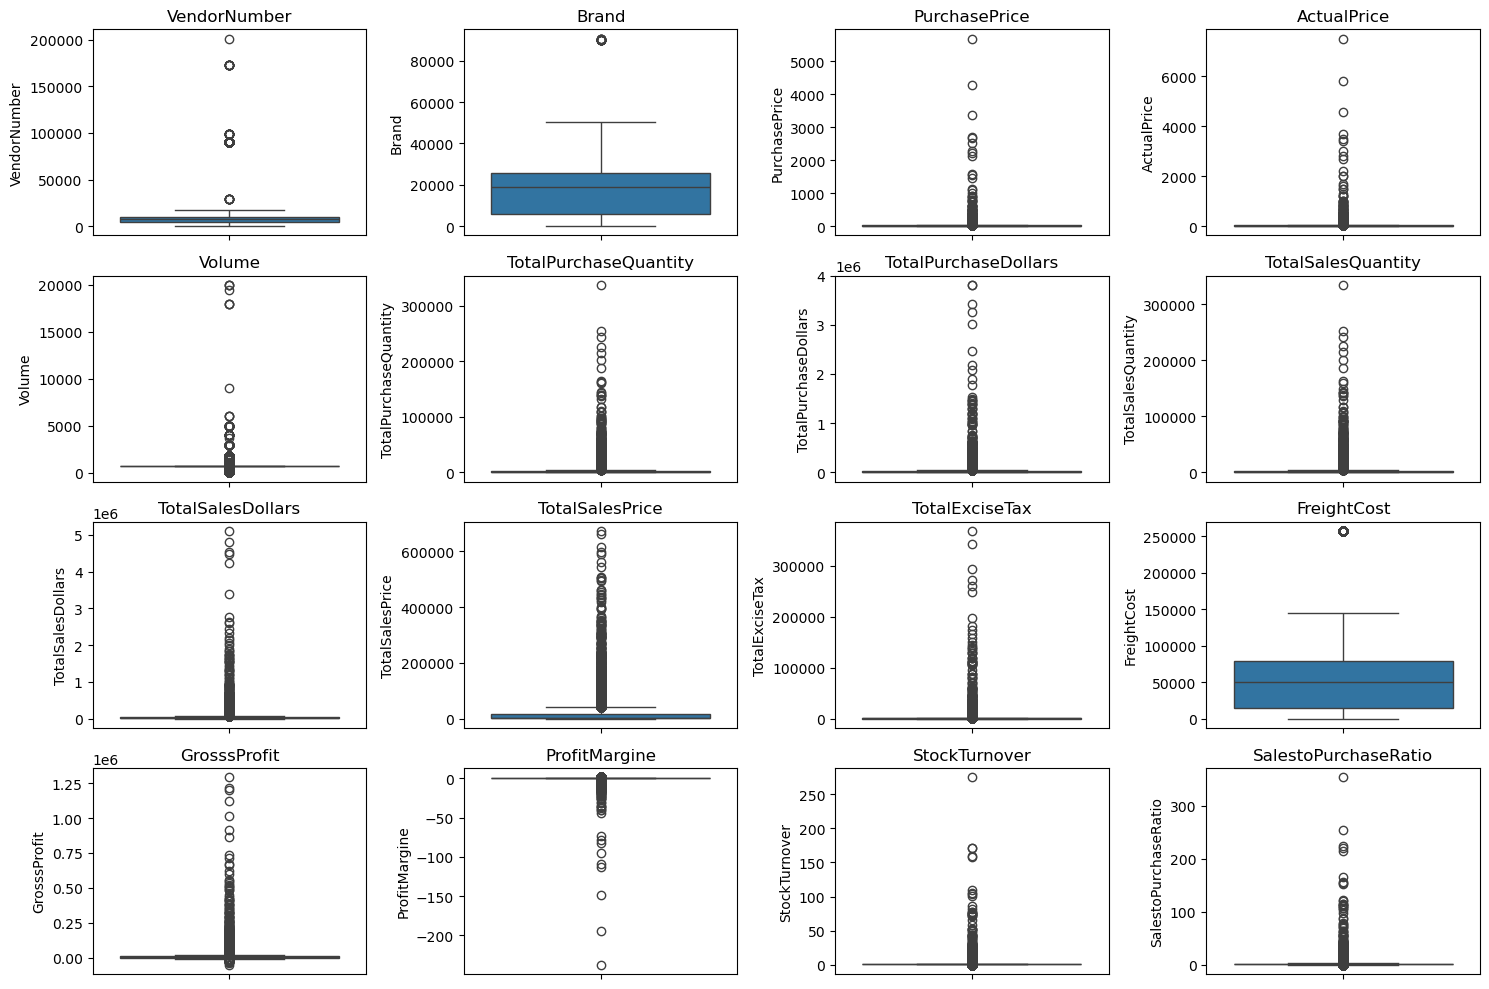

In [15]:
# Outlier detection with boxplot
numeric_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4,4,i+1)  #Adjust grid layout as needed
    sns.boxplot(y=df[col])
    plt.title(col)
    
plt.tight_layout()
plt.show()

In [27]:
df = pd.read_sql_query("""
SELECT * 
FROM Vendor_Sales_Summary
WHERE GrosssProfit > 0
  AND ProfitMargine > 0
  AND TotalSalesQuantity > 0
""", conn)


In [23]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrosssProfit,ProfitMargine,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,0.252977,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,0.210628,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,0.246758,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,0.271399,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,0.284128,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,0.834483,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,0.964362,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,0.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,0.989740,72.000000,97.469388


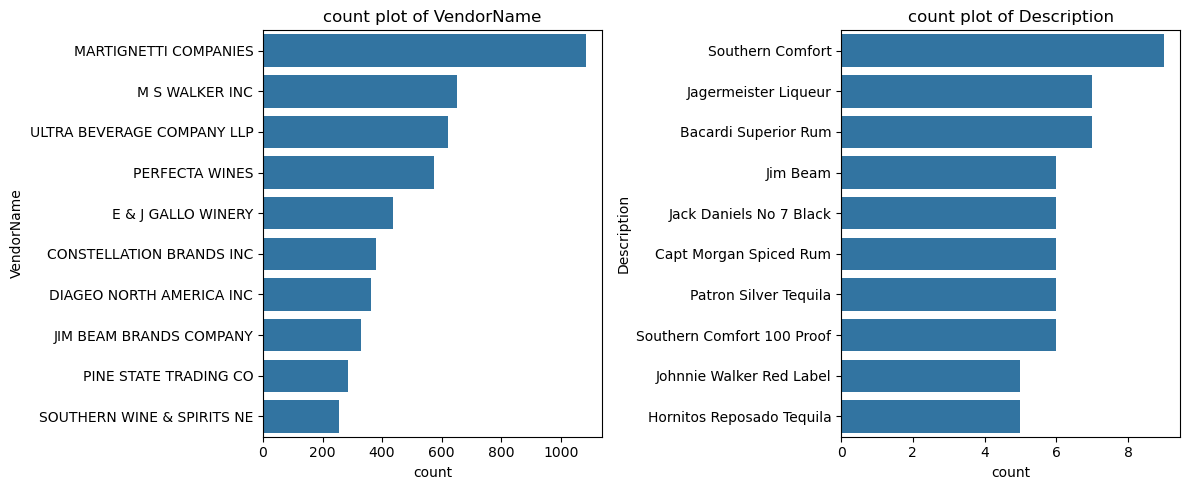

In [29]:
# plot for Categorical Data
categorical_cols=["VendorName","Description"]
plt.figure(figsize=(12,5))              #Sets the overall size of the figure window to 12 units wide and 5 units tall (in inches).
for i, col in enumerate(categorical_cols):    #loop through categorical_cols, using enumerate so i gives you the index (0, 1, ...) and col gives you the column name.

    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10])  #Top 10 Categories
    plt.title(f"count plot of {col}")
    plt.tight_layout()
    plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

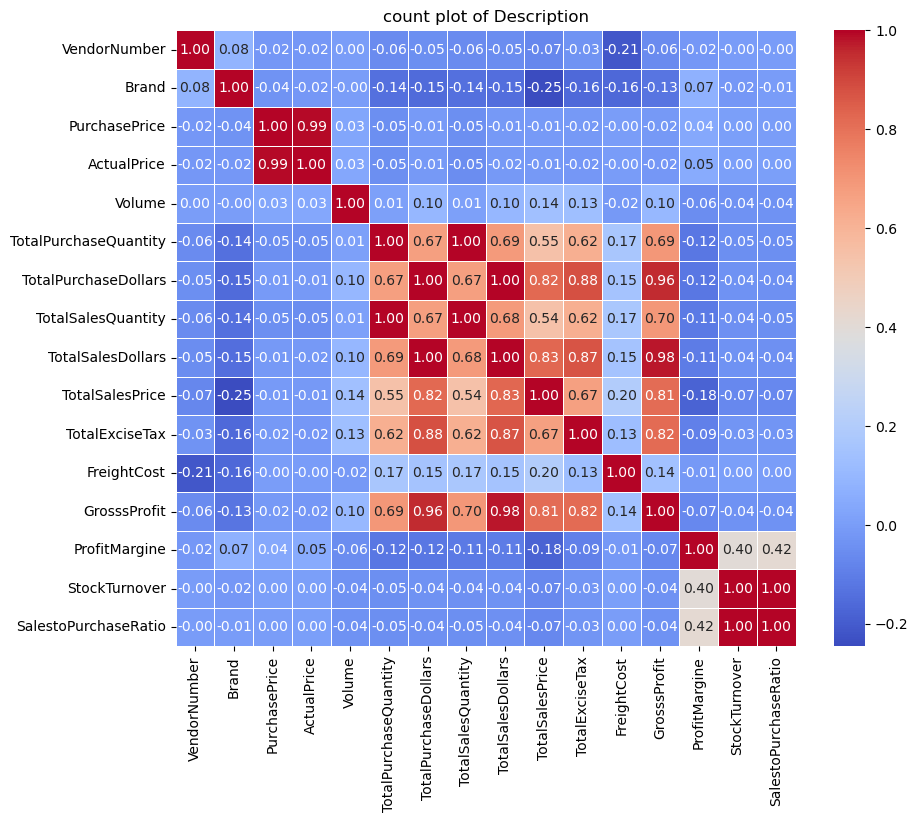

In [41]:
# Correalation Heatmap
plt.figure(figsize=(10,8))
correlation_matrix=df[numeric_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidth=0.5) # fmt format two places
plt.title(f"count plot of {col}")
plt.show

## Correalational Analysis
* Purchase price has low correlation with TotalSalesDollars
* strong correlatio between TotalSales

In [70]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargine':'mean'}).reset_index()

In [69]:
df.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrosssProfit',
       'ProfitMargine', 'StockTurnover', 'SalestoPurchaseRatio'],
      dtype='object')

In [71]:
brand_performance

,Description,TotalSalesDollars,ProfitMargine
0,(RI) 1,21519.09,0.180607
1,.nparalleled Svgn Blanc,1094.63,0.299782
2,10 Span Cab Svgn CC,2703.89,0.209376
3,10 Span Chard CC,3325.56,0.278064
4,10 Span Pnt Gris Monterey Cy,2082.22,0.322262
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,0.295257
7703,Zuccardi Q Malbec,1639.18,0.239815
7704,Zum Rsl,10857.34,0.326750
7705,Zwack Liqueur,227.88,0.166535


### Defining Threshold Parameters

In [73]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margine_threshold = brand_performance['ProfitMargine'].quantile(0.85)

In [46]:
low_sales_threshold

np.float64(560.299)

In [47]:
high_margine_threshold

np.float64(0.6497017552750112)

### Brands need Promotional and price adjustments
* Brands with high prifit but low sales

In [75]:
target_brands=brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargine'] >= high_margine_threshold)
]
print("Brands with high prifit but low sales Margines:")
display(target_brands.sort_values('TotalSalesDollars'))


Brands with high prifit but low sales Margines:


,Description,TotalSalesDollars,ProfitMargine
6199,Santa Rita Organic Svgn Bl,9.99,0.664665
2369,Debauchery Pnt Nr,11.58,0.659758
2070,Concannon Glen Ellen Wh Zin,15.95,0.834483
2188,Crown Royal Apple,27.86,0.898062
6237,Sauza Sprklg Wild Berry Marg,27.96,0.821531
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,0.767473
2271,Dad's Hat Rye Whiskey,538.89,0.818516
57,A Bichot Clos Marechaudes,539.94,0.677409
6245,Sbragia Home Ranch Merlot,549.75,0.664447


In [81]:
brand_performance=pd.DataFrame(brand_performance)

In [82]:
type(brand_performance)

pandas.core.frame.DataFrame

### Scatter Plot Chart

In [77]:
brand_performance = brand_performance['TotalSalesDollars']<10000   # FOR BETTER VISUALIZATION

In [90]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargine', color="blue", label="All Brands", alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargine', color="red", label="Target Brands")

plt.axhline(high_margine_threshold, linestyle='--', color='black', label="High Margine Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margine (%)")
plt.title("Brands for Promotional and Pricing Adjustment")
plt.legend()
plt.grid(True)
plt.show()


ValueError: Could not interpret value `ProfitMargine` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

#### which Vendor and Brand show highes Sales?


In [91]:
def format_dollars(value):
    if value >=1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >=1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [94]:
top_vendors=df.groupby("VendorName")['TotalSalesDollars'].sum().nlargest(10)
top_Brands=df.groupby("Description")['TotalSalesDollars'].sum().nlargest(10)

In [95]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [96]:
top_Brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [99]:
top_Brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

In [98]:
conn.close()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrosssProfit,ProfitMargine,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,0.252977,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,0.210628,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,0.246758,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,0.271399,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,0.284128,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,0.834483,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,0.964362,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,0.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,0.989740,72.000000,97.469388


In [5]:
conn.close()